# WDSR

In [1]:
import os
import matplotlib.pyplot as plt

from data import DIV2K
from model.wdsr import wdsr_b
from train import WdsrTrainer

%matplotlib inline

In [2]:
# Number of residual blocks
depth = 32

# Super-resolution factor
scale = 4

# Downgrade operator
downgrade = 'bicubic'

In [3]:
# Location of model weights (needed for demo)
weights_dir = f'model'
weights_file = os.path.join(weights_dir, 'weights.h5')

os.makedirs(weights_dir, exist_ok=True)

## Datasets

In [12]:
div2k_train = DIV2K(scale=scale, subset='train', downgrade=downgrade, images_dir='div2k/images',
                    caches_dir='div2k/caches')
div2k_valid = DIV2K(scale=scale, subset='valid', downgrade=downgrade, images_dir='div2k/images',
                    caches_dir='div2k/caches')

In [4]:
train_ds = div2k_train.dataset(batch_size=16, random_transform=True)
valid_ds = div2k_valid.dataset(batch_size=1, random_transform=False, repeat_count=1)

## Demo

In [16]:
model = wdsr_b(scale=scale, num_res_blocks=depth)
model.load_weights(weights_file)

In [28]:
from model import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    plot_sample(lr, sr)
   

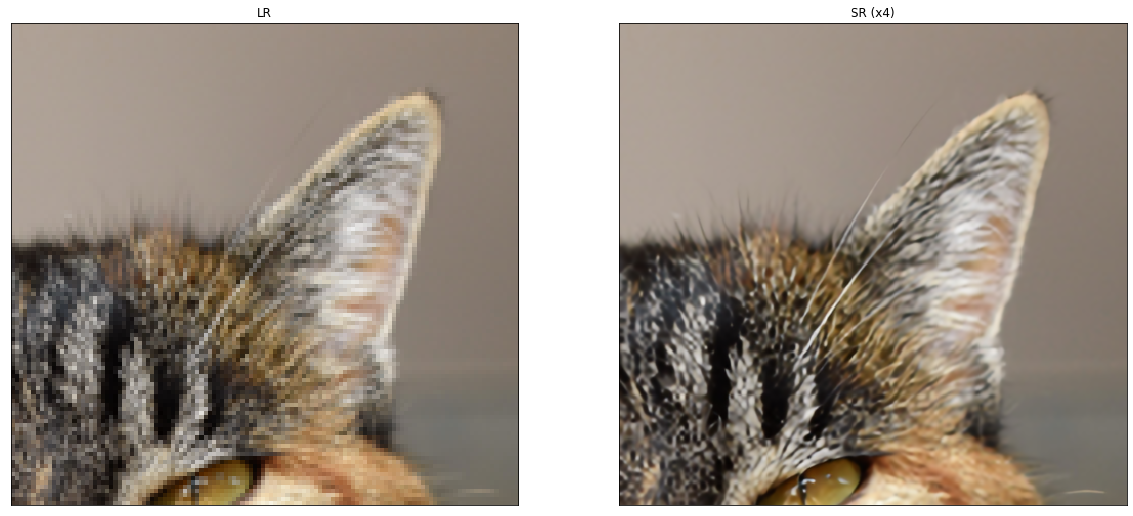

In [29]:
resolve_and_plot('demo/0869x4-crop.png')

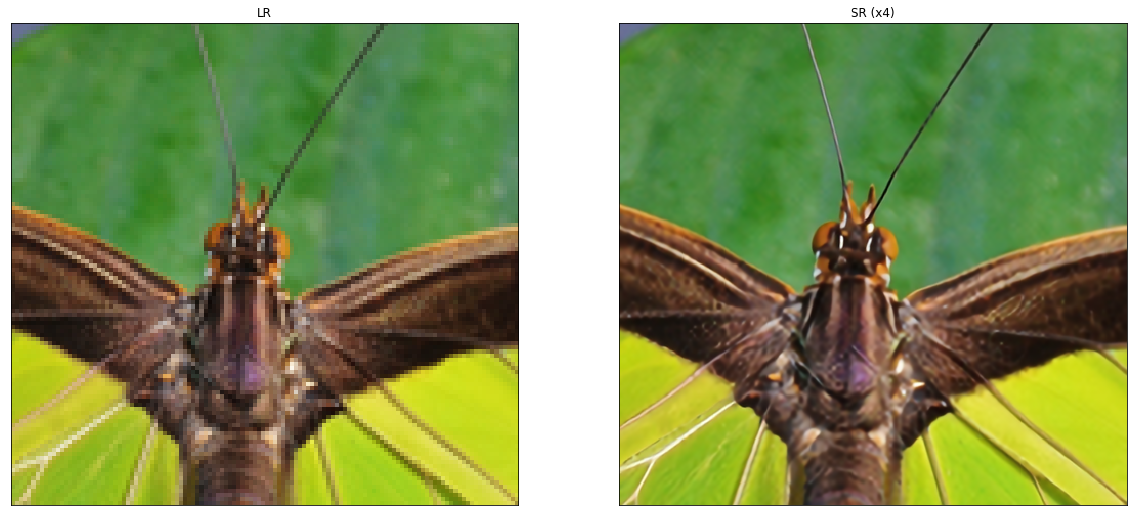

In [30]:
resolve_and_plot('demo/0829x4-crop.png')

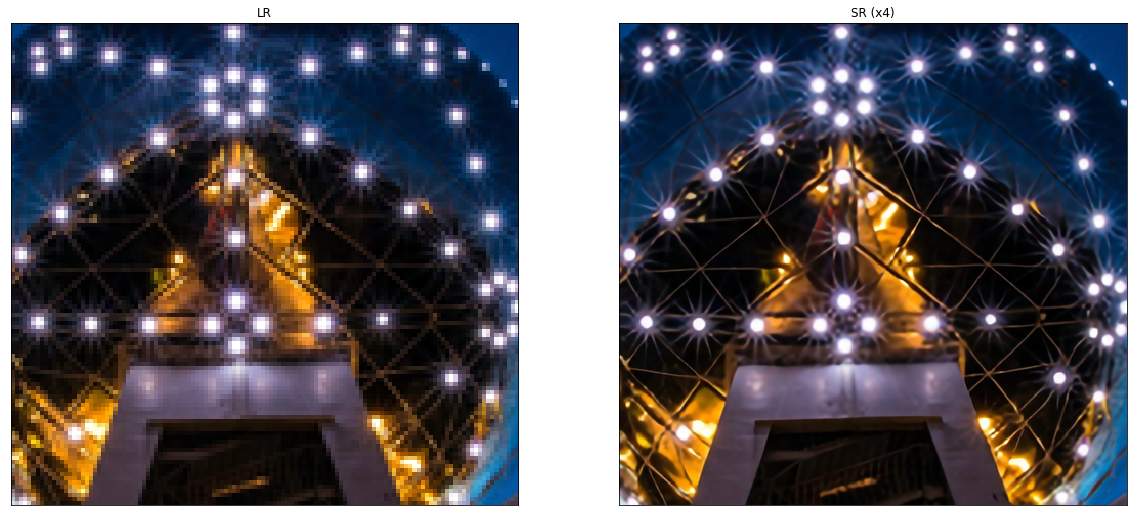

In [31]:
resolve_and_plot('demo/0851x4-crop.png')

In [ ]:
# show random samples of input and enhanced images (very slow without GPU)
import numpy as np

samp = np.random.randint(0,len(valid_ds),2)
for im in samp:
    im = valid_ds[im][0].squeeze(0)
    sr = resolve_single(model, im)
    plot_sample(im, sr)
    plt.show()
    print('-'*10)

In [ ]:
valid_ds = list(valid_ds.as_numpy_iterator())